In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.datasets import boston_housing
from keras.layers import Dense, Dropout
from keras.utils import multi_gpu_model
from keras import regularizers  # 正则化
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

## 加载数据

In [0]:
import pandas as pd
pd.set_option('precision', 12)

In [0]:
db=pd.read_csv('test.csv',header=None)

In [14]:
db=db.dropna(axis='columns')
db

,0,1,2,3,4,5,6,7,8
0,output,deepth,one step,two step,three step,four step,five step,six step,seven step
1,400,30,1.00E-05,8.20E-05,8.26E-05,8.32E-05,8.39E-05,8.47E-05,2.81E-04
2,400,60,1.00E-05,8.19E-05,8.26E-05,8.32E-05,8.39E-05,8.47E-05,2.81E-04
3,400,90,1.00E-05,8.20E-05,8.25E-05,8.31E-05,8.39E-05,8.46E-05,2.81E-04
4,400,120,1.00E-05,8.19E-05,8.26E-05,8.32E-05,8.39E-05,8.47E-05,2.81E-04
5,400,150,1.00E-05,8.19E-05,8.25E-05,8.32E-05,8.39E-05,8.46E-05,2.81E-05
6,925,30,1.00E-05,8.19E-05,8.25E-05,8.32E-05,8.39E-05,8.47E-05,2.81E-04
7,925,60,1.00E-05,8.20E-05,8.25E-05,8.32E-05,8.39E-05,8.47E-05,2.81E-04
8,925,90,1.00E-05,8.19E-05,8.25E-05,8.32E-05,8.39E-05,8.46E-05,2.81E-04
9,925,120,1.00E-05,8.19E-05,8.25E-05,8.31E-05,8.39E-05,8.46E-05,2.81E-04


In [88]:
db=pd.DataFrame(db) # 加载数据

y_train=db.loc[1:20,0]
y_test=db.iloc[21:26,0]

x_train=db.loc[1:20,2:9]
x_test=db.iloc[21:26,2:9]






# 转成DataFrame格式方便数据处理
x_train_pd = pd.DataFrame(x_train)
y_train_pd = pd.DataFrame(y_train)
x_valid_pd = pd.DataFrame(x_test)
y_valid_pd = pd.DataFrame(y_test)
print(x_train_pd.head(5))
print('-------------------')
print(y_train_pd.head(5))
print(x_test)
print(y_test)

          2         3         4         5         6         7         8
1  1.00E-05  8.20E-05  8.26E-05  8.32E-05  8.39E-05  8.47E-05  2.81E-04
2  1.00E-05  8.19E-05  8.26E-05  8.32E-05  8.39E-05  8.47E-05  2.81E-04
3  1.00E-05  8.20E-05  8.25E-05  8.31E-05  8.39E-05  8.46E-05  2.81E-04
4  1.00E-05  8.19E-05  8.26E-05  8.32E-05  8.39E-05  8.47E-05  2.81E-04
5  1.00E-05  8.19E-05  8.25E-05  8.32E-05  8.39E-05  8.46E-05  2.81E-05
-------------------
     0
1  400
2  400
3  400
4  400
5  400
           2         3         4         5         6         7         8
21  1.00E-05  8.20E-05  8.26E-05  8.32E-05  8.39E-05  8.47E-05  2.81E-04
22  1.00E-05  8.20E-05  8.26E-05  8.32E-05  8.39E-05  8.47E-05  2.81E-05
23  1.00E-05  8.20E-05  8.26E-05  8.32E-05  8.39E-05  8.47E-05  2.81E-04
24  1.00E-05  8.20E-05  8.26E-05  8.32E-05  8.39E-05  8.47E-05  2.81E-05
25  1.00E-05  8.19E-05  8.26E-05  8.32E-05  8.39E-05  8.47E-05  2.81E-04
21    500
22    500
23    500
24    500
25    500
Name: 0, dtype: ob

In [81]:
x_test

,2,3,4,5,6,7,8
21,1.00E-05,8.20E-05,8.26E-05,8.32E-05,8.39E-05,8.47E-05,2.81E-04
22,1.00E-05,8.20E-05,8.26E-05,8.32E-05,8.39E-05,8.47E-05,2.81E-05
23,1.00E-05,8.20E-05,8.26E-05,8.32E-05,8.39E-05,8.47E-05,2.81E-04
24,1.00E-05,8.20E-05,8.26E-05,8.32E-05,8.39E-05,8.47E-05,2.81E-05
25,1.00E-05,8.19E-05,8.26E-05,8.32E-05,8.39E-05,8.47E-05,2.81E-04


In [89]:
y_test

21    500
22    500
23    500
24    500
25    500
Name: 0, dtype: object

## 数据归一化

In [0]:
# 训练集归一化
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(x_train_pd)
x_train = min_max_scaler.transform(x_train_pd)

min_max_scaler.fit(y_train_pd)
y_train = min_max_scaler.transform(y_train_pd)

# 验证集归一化
min_max_scaler.fit(x_valid_pd)
x_valid = min_max_scaler.transform(x_valid_pd)

min_max_scaler.fit(y_valid_pd)
y_valid = min_max_scaler.transform(y_valid_pd)


In [96]:
x_valid.shape

(5, 7)

In [92]:
y_train

array([[0.     ],
       [0.     ],
       [0.     ],
       [0.     ],
       [0.     ],
       [0.65625],
       [0.65625],
       [0.65625],
       [0.65625],
       [0.65625],
       [0.74375],
       [0.74375],
       [0.74375],
       [0.74375],
       [0.74375],
       [1.     ],
       [1.     ],
       [1.     ],
       [1.     ],
       [1.     ]])

In [93]:
x_train

array([[0., 1., 1., 1., 0., 1., 1.],
       [0., 0., 1., 1., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 0., 1., 1.],
       [0., 0., 1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 0.]])

## 训练

In [94]:

# 单CPU or GPU版本，若有GPU则自动切换
model = Sequential()  # 初始化，很重要！
model.add(Dense(units = 10,   # 输出大小
                activation='relu',  # 激励函数
                input_shape=(x_train_pd.shape[1],)  # 输入大小, 也就是列的大小
               )
         )

model.add(Dropout(0.2))  # 丢弃神经元链接概率

model.add(Dense(units = 15,
#                 kernel_regularizer=regularizers.l2(0.01),  # 施加在权重上的正则项
#                 activity_regularizer=regularizers.l1(0.01),  # 施加在输出上的正则项
                activation='relu' # 激励函数
                # bias_regularizer=keras.regularizers.l1_l2(0.01)  # 施加在偏置向量上的正则项
               )
         )

model.add(Dense(units = 1,   
                activation='linear'  # 线性激励函数 回归一般在输出层用这个激励函数  
               )
         )

print(model.summary())  # 打印网络层次结构

model.compile(loss='mse',  # 损失均方误差
              optimizer='adam',  # 优化器
             )

history = model.fit(x_train, y_train,
          epochs=1000,  # 迭代次数
          batch_size=200,  # 每次用来梯度下降的批处理数据大小
          verbose=2,  # verbose：日志冗长度，int：冗长度，0：不输出训练过程，1：输出训练进度，2：输出每一个epoch
          validation_data = (x_valid, y_valid)  # 验证集
        )

# 多GPU版本
# parallel_model = multi_gpu_model(model, gpus=4)
# parallel_model.compile(loss='mse',  # 多分类     
#                        optimizer='adam',
#                       )

# This `fit` call will be distributed on 4 GPUs.
# Since the batch size is 50, each GPU will process 32 samples.
# batch_size = 512
# epochs = 2
# history = parallel_model.fit(
#           x_train, 
#           y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           validation_split = 0.2  # 从训练集分割出20%的数据作为验证集
#         )

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                80        
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 16        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
None
Train on 20 samples, validate on 5 samples
Epoch 1/1000
 - 1s - loss: 0.5633 - val_loss: 0.0473
Epoch 2/1000
 - 0s - loss: 0.5505 - val_loss: 0.0437
Epoch 3/1000
 - 0s - loss: 0.5493 - val_loss: 0.0403
Epoch 4/1000
 - 0s - loss: 0.5837 - val_loss: 0

## 训练过程可视化

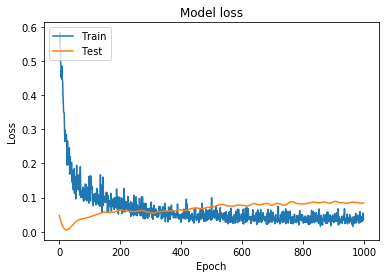

In [97]:
import matplotlib.pyplot as plt
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 保存模型 & 模型可视化 & 加载模型

In [0]:
from keras.utils import plot_model
from keras.models import load_model
# 保存模型
model.save('model_MLP.h5')  # creates a HDF5 file 'my_model.h5'

#模型可视化 pip install pydot
plot_model(model, to_file='model_MLP.png', show_shapes=True)

# 加载模型
model = load_model('model_MLP.h5')

## 模型的预测功能

In [99]:
# 预测
y_new = model.predict(x_valid)
# 反归一化
min_max_scaler.fit(y_valid_pd)
y_new = min_max_scaler.inverse_transform(y_new)
print(y_new)


[[500.0429 ]
 [500.02518]
 [500.0429 ]
 [500.02518]
 [500.6449 ]]


In [0]:
from google.colab import drive
drive.mount('/content/drive')